Importing the necessary packages for data analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<font color = 'seagreen'>Importing the file  and doing basic data cleaning before proceeding to further analysis<font>

In [2]:
df = pd.read_csv('./StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df['gender'] = df['gender'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['parental level of education'] = df['parental level of education'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['test preparation course'] = df['test preparation course'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.1 KB


In [7]:
df['total'] = df[['math score','reading score','writing score']].sum(axis=1)
df['avg'] = df[['math score','reading score','writing score']].mean(axis=1).round(2)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [8]:
df.describe()

,math score,reading score,writing score,total,avg
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770580
std,15.16308,14.600192,15.195657,42.771978,14.257311
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.330000
50%,66.00000,70.000000,69.000000,205.000000,68.330000
75%,77.00000,79.000000,79.000000,233.000000,77.670000
max,100.00000,100.000000,100.000000,300.000000,100.000000


<font color = 'seagreen'>Understanding the distribution of data for categorical columns like gender, race,test preparation course and parental level of education<font>

In [9]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [10]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [11]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [12]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

<b><font color = 'blue'>Inference from the above distibutions</b></font>
    <li><font color = 'green'> There are almost equivalent number of male, female test takers
    <li> Group A accounts for the least number of test takers whereas Group C has most
    <li> Test takers with parents having Masters degree are the lowest
    <li> Majority i.e. ~65% of the test takers have not taken any course prior to taking the test
</li></font>


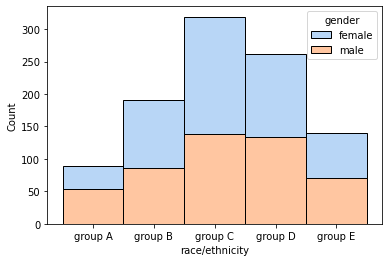

In [13]:
sns.histplot(data = df, x = 'race/ethnicity', hue = 'gender', 
             multiple = 'stack', palette = 'pastel')
plt.show()

<b><font color = 'blue'>Inference</b></font>
    <li><font color = 'green'> The gender distribution is almost equivalent across all Group 
    except for <b>Group A</b> where male test takers are in majority
    
</li></font>


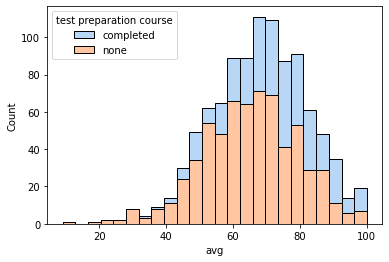

In [14]:
sns.histplot(data = df, x = 'avg', hue = 'test preparation course',
             multiple = 'stack', palette = 'pastel')
plt.show()

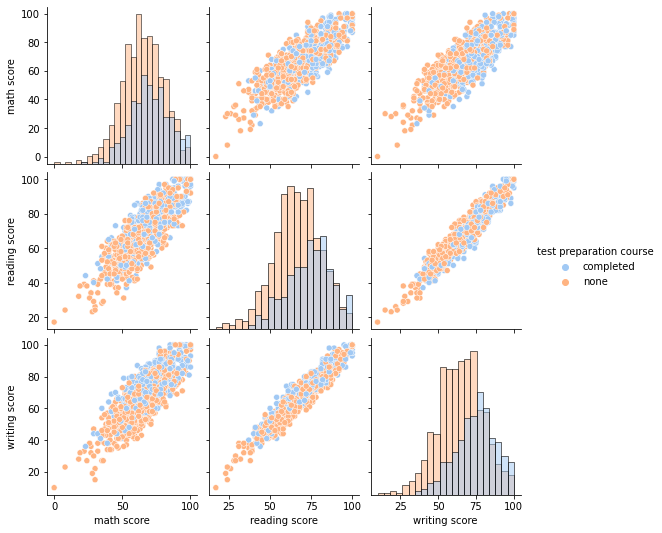

In [15]:
sns.pairplot(df[['math score','reading score','writing score','test preparation course']], 
             hue = 'test preparation course',palette = 'pastel', diag_kind = 'hist')

<b><font color = 'blue'>Inference</b></font>
    <li><font color = 'green'> The test takers who completed course tend to show better mean score than the ones who did not
    
</li></font>


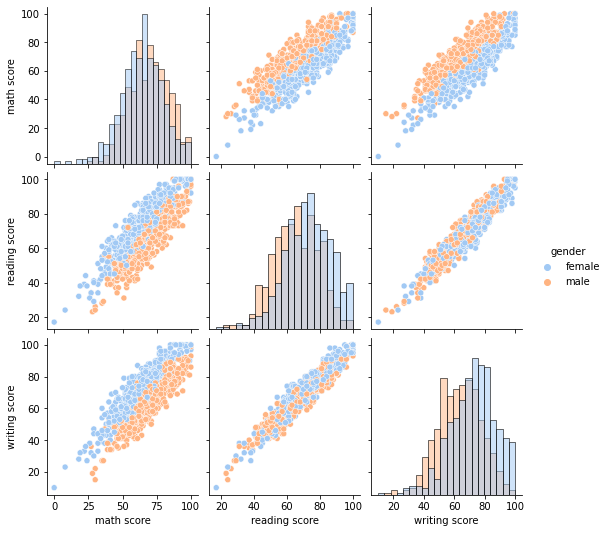

In [16]:
sns.pairplot(df[['math score','reading score','writing score','gender']], 
             hue = 'gender',palette = 'pastel', diag_kind = 'hist')

<b><font color = 'blue'>Inference</b></font>
    <li><font color = 'green'> Male test takers perform better in Maths
    <li><font color = 'green'> Female test takers are performing better in reading and writing skills
    
    
</li></font>


In [17]:
df.groupby(['parental level of education','gender']).mean()

math score  reading score  writing score  \
parental level of education gender                                             
associate's degree          female   65.250000      74.120690      74.000000   
                            male     70.764151      67.433962      65.405660   
bachelor's degree           female   68.349206      77.285714      78.380952   
                            male     70.581818      68.090909      67.654545   
high school                 female   59.351064      68.202128      66.691489   
                            male     64.705882      61.480392      58.539216   
master's degree             female   66.500000      76.805556      77.638889   
                            male     74.826087      73.130435      72.608696   
some college                female   65.406780      73.550847      74.050847   
                            male     69.009259      64.990741      63.148148   
some high school            female   59.296703      69.109890      68.285714   
                            male     67.840909      64.693182      61.375000   

                                         total        avg  
parental level of education gender                         
associate's degree          female  213.370690  71.123621  
                            male    203.603774  67.867642  
bachelor's degree           female  224.015873  74.672063  
                            male    206.327273  68.776182  
high school                 female  194.244681  64.748404  
                            male    184.725490  61.575490  
master's degree             female  220.944444  73.648056  
                            male    220.565217  73.521304  
some college                female  213.008475  71.002542  
                            male    197.148148  65.715741  
some high school            female  196.692308  65.564176  
                            male    193.909091  64.635568

<b><font color = 'blue'>Inference</b></font>
    <li><font color = 'green'> Female Test takers whose parents have Bachelor's degree have higher average scores
    <li><font color = 'green'> Test takers whose parents have some high school degree tend to have least scores amongst their peers    
    
</li></font>


In [18]:
df.groupby(['race/ethnicity']).mean()

,math score,reading score,writing score,total,avg
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992135
group B,63.452632,67.352632,65.600000,196.405263,65.468579
group C,64.463950,69.103448,67.827586,201.394984,67.131567
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752000


<AxesSubplot:xlabel='race/ethnicity'>

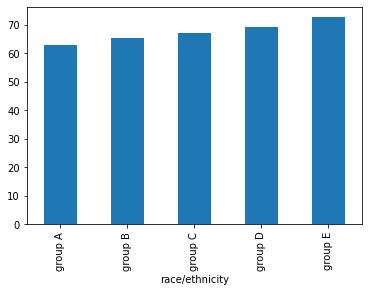

In [23]:
df_grp = df.groupby(['race/ethnicity']).mean()
df_grp['avg'].plot(kind = 'bar')

<b><font color = 'blue'>Inference</b></font>
    <li><font color = 'green'> Group A has least average scores with Group E leading    
</li></font>
